
# CODE TO PREDICT HOUSE PRICES USING ANNs (REGRESSION TASK)
# Brilliant



# PROBLEM STATEMENT

- Dataset includes house sale prices for King County in USA. 
- Homes that are sold in the time period: May, 2014 and May, 2015.
- Data Source: https://www.kaggle.com/harlfoxem/housesalesprediction

- Columns:
    - ida: notation for a house
    - date: Date house was sold
    - price: Price is prediction target
    - bedrooms: Number of Bedrooms/House
    - bathrooms: Number of bathrooms/House
    - sqft_living: square footage of the home
    - sqft_lot: square footage of the lot
    - floors: Total floors (levels) in house
    - waterfront: House which has a view to a waterfront
    - view: Has been viewed
    - condition: How good the condition is ( Overall )
    - grade: overall grade given to the housing unit, based on King County grading system
    - sqft_abovesquare: footage of house apart from basement
    - sqft_basement: square footage of the basement
    - yr_built: Built Year
    - yr_renovated: Year when house was renovated
    - zipcode: zip
    - lat: Latitude coordinate
    - long: Longitude coordinate
    - sqft_living15: Living room area in 2015(implies-- some renovations) 
    - sqft_lot15: lotSize area in 2015(implies-- some renovations)

# STEP #0: LIBRARIES IMPORT


In [1]:
#Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# STEP #1: IMPORT DATASET

In [2]:
#Import data
house_df = pd.read_csv('kc_house_data.csv', encoding = 'ISO-8859-1')

In [3]:
house_df

id             date     price  bedrooms  bathrooms  \
0      7129300520  20141013T000000  221900.0         3       1.00   
1      6414100192  20141209T000000  538000.0         3       2.25   
2      5631500400  20150225T000000  180000.0         2       1.00   
3      2487200875  20141209T000000  604000.0         4       3.00   
4      1954400510  20150218T000000  510000.0         3       2.00   
...           ...              ...       ...       ...        ...   
21608   263000018  20140521T000000  360000.0         3       2.50   
21609  6600060120  20150223T000000  400000.0         4       2.50   
21610  1523300141  20140623T000000  402101.0         2       0.75   
21611   291310100  20150116T000000  400000.0         3       2.50   
21612  1523300157  20141015T000000  325000.0         2       0.75   

       sqft_living  sqft_lot  floors  waterfront  view  ...  grade  \
0             1180      5650     1.0           0     0  ...      7   
1             2570      7242     2.0           0     0  ...      7   
2              770     10000     1.0           0     0  ...      6   
3             1960      5000     1.0           0     0  ...      7   
4             1680      8080     1.0           0     0  ...      8   
...            ...       ...     ...         ...   ...  ...    ...   
21608         1530      1131     3.0           0     0  ...      8   
21609         2310      5813     2.0           0     0  ...      8   
21610         1020      1350     2.0           0     0  ...      7   
21611         1600      2388     2.0           0     0  ...      8   
21612         1020      1076     2.0           0     0  ...      7   

       sqft_above  sqft_basement  yr_built  yr_renovated  zipcode      lat  \
0            1180              0      1955             0    98178  47.5112   
1            2170            400      1951          1991    98125  47.7210   
2             770              0      1933             0    98028  47.7379   
3            1050            910      1965             0    98136  47.5208   
4            1680              0      1987             0    98074  47.6168   
...           ...            ...       ...           ...      ...      ...   
21608        1530              0      2009             0    98103  47.6993   
21609        2310              0      2014             0    98146  47.5107   
21610        1020              0      2009             0    98144  47.5944   
21611        1600              0      2004             0    98027  47.5345   
21612        1020              0      2008             0    98144  47.5941   

          long  sqft_living15  sqft_lot15  
0     -122.257           1340        5650  
1     -122.319           1690        7639  
2     -122.233           2720        8062  
3     -122.393           1360        5000  
4     -122.045           1800        7503  
...        ...            ...         ...  
21608 -122.346           1530        1509  
21609 -122.362           1830        7200  
21610 -122.299           1020        2007  
21611 -122.069           1410        1287  
21612 -122.299           1020        1357  

[21613 rows x 21 columns]

In [4]:
house_df.head(5)

id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7        1180              0   
1      7242     2.0           0     0  ...      7        2170            400   
2     10000     1.0           0     0  ...      6         770              0   
3      5000     1.0           0     0  ...      7        1050            910   
4      8080     1.0           0     0  ...      8        1680              0   

   yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0      1955             0    98178  47.5112 -122.257           1340   
1      1951          1991    98125  47.7210 -122.319           1690   
2      1933             0    98028  47.7379 -122.233           2720   
3      1965             0    98136  47.5208 -122.393           1360   
4      1987             0    98074  47.6168 -122.045           1800   

   sqft_lot15  
0        5650  
1        7639  
2        8062  
3        5000  
4        7503  

[5 rows x 21 columns]

In [6]:
house_df.tail(5)

id             date     price  bedrooms  bathrooms  \
21608   263000018  20140521T000000  360000.0         3       2.50   
21609  6600060120  20150223T000000  400000.0         4       2.50   
21610  1523300141  20140623T000000  402101.0         2       0.75   
21611   291310100  20150116T000000  400000.0         3       2.50   
21612  1523300157  20141015T000000  325000.0         2       0.75   

       sqft_living  sqft_lot  floors  waterfront  view  ...  grade  \
21608         1530      1131     3.0           0     0  ...      8   
21609         2310      5813     2.0           0     0  ...      8   
21610         1020      1350     2.0           0     0  ...      7   
21611         1600      2388     2.0           0     0  ...      8   
21612         1020      1076     2.0           0     0  ...      7   

       sqft_above  sqft_basement  yr_built  yr_renovated  zipcode      lat  \
21608        1530              0      2009             0    98103  47.6993   
21609        2310              0      2014             0    98146  47.5107   
21610        1020              0      2009             0    98144  47.5944   
21611        1600              0      2004             0    98027  47.5345   
21612        1020              0      2008             0    98144  47.5941   

          long  sqft_living15  sqft_lot15  
21608 -122.346           1530        1509  
21609 -122.362           1830        7200  
21610 -122.299           1020        2007  
21611 -122.069           1410        1287  
21612 -122.299           1020        1357  

[5 rows x 21 columns]

In [7]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [8]:
house_df.describe()

id         price      bedrooms     bathrooms   sqft_living  \
count  2.161300e+04  2.161300e+04  21613.000000  21613.000000  21613.000000   
mean   4.580302e+09  5.400881e+05      3.370842      2.114757   2079.899736   
std    2.876566e+09  3.671272e+05      0.930062      0.770163    918.440897   
min    1.000102e+06  7.500000e+04      0.000000      0.000000    290.000000   
25%    2.123049e+09  3.219500e+05      3.000000      1.750000   1427.000000   
50%    3.904930e+09  4.500000e+05      3.000000      2.250000   1910.000000   
75%    7.308900e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     33.000000      8.000000  13540.000000   

           sqft_lot        floors    waterfront          view     condition  \
count  2.161300e+04  21613.000000  21613.000000  21613.000000  21613.000000   
mean   1.510697e+04      1.494309      0.007542      0.234303      3.409430   
std    4.142051e+04      0.539989      0.086517      0.766318      0.650743   
min    5.200000e+02      1.000000      0.000000      0.000000      1.000000   
25%    5.040000e+03      1.000000      0.000000      0.000000      3.000000   
50%    7.618000e+03      1.500000      0.000000      0.000000      3.000000   
75%    1.068800e+04      2.000000      0.000000      0.000000      4.000000   
max    1.651359e+06      3.500000      1.000000      4.000000      5.000000   

              grade    sqft_above  sqft_basement      yr_built  yr_renovated  \
count  21613.000000  21613.000000   21613.000000  21613.000000  21613.000000   
mean       7.656873   1788.390691     291.509045   1971.005136     84.402258   
std        1.175459    828.090978     442.575043     29.373411    401.679240   
min        1.000000    290.000000       0.000000   1900.000000      0.000000   
25%        7.000000   1190.000000       0.000000   1951.000000      0.000000   
50%        7.000000   1560.000000       0.000000   1975.000000      0.000000   
75%        8.000000   2210.000000     560.000000   1997.000000      0.000000   
max       13.000000   9410.000000    4820.000000   2015.000000   2015.000000   

            zipcode           lat          long  sqft_living15     sqft_lot15  
count  21613.000000  21613.000000  21613.000000   21613.000000   21613.000000  
mean   98077.939805     47.560053   -122.213896    1986.552492   12768.455652  
std       53.505026      0.138564      0.140828     685.391304   27304.179631  
min    98001.000000     47.155900   -122.519000     399.000000     651.000000  
25%    98033.000000     47.471000   -122.328000    1490.000000    5100.000000  
50%    98065.000000     47.571800   -122.230000    1840.000000    7620.000000  
75%    98118.000000     47.678000   -122.125000    2360.000000   10083.000000  
max    98199.000000     47.777600   -121.315000    6210.000000  871200.000000

# STEP #2: VISUALIZE DATASET

<Axes: xlabel='sqft_living', ylabel='price'>

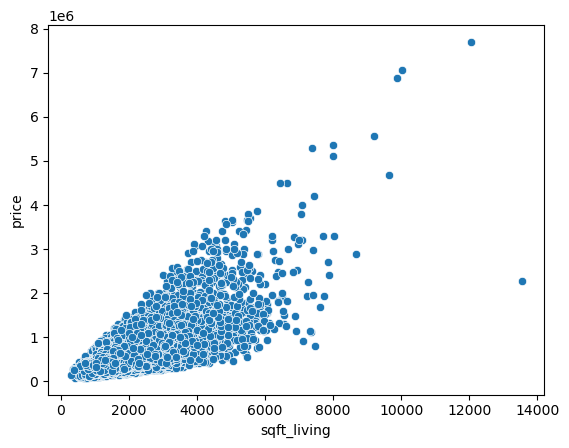

In [9]:
sns.scatterplot(x = 'sqft_living', y = 'price', data = house_df)

array([[<Axes: title={'center': 'id'}>,
        <Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'bedrooms'}>,
        <Axes: title={'center': 'bathrooms'}>],
       [<Axes: title={'center': 'sqft_living'}>,
        <Axes: title={'center': 'sqft_lot'}>,
        <Axes: title={'center': 'floors'}>,
        <Axes: title={'center': 'waterfront'}>],
       [<Axes: title={'center': 'view'}>,
        <Axes: title={'center': 'condition'}>,
        <Axes: title={'center': 'grade'}>,
        <Axes: title={'center': 'sqft_above'}>],
       [<Axes: title={'center': 'sqft_basement'}>,
        <Axes: title={'center': 'yr_built'}>,
        <Axes: title={'center': 'yr_renovated'}>,
        <Axes: title={'center': 'zipcode'}>],
       [<Axes: title={'center': 'lat'}>,
        <Axes: title={'center': 'long'}>,
        <Axes: title={'center': 'sqft_living15'}>,
        <Axes: title={'center': 'sqft_lot15'}>]], dtype=object)

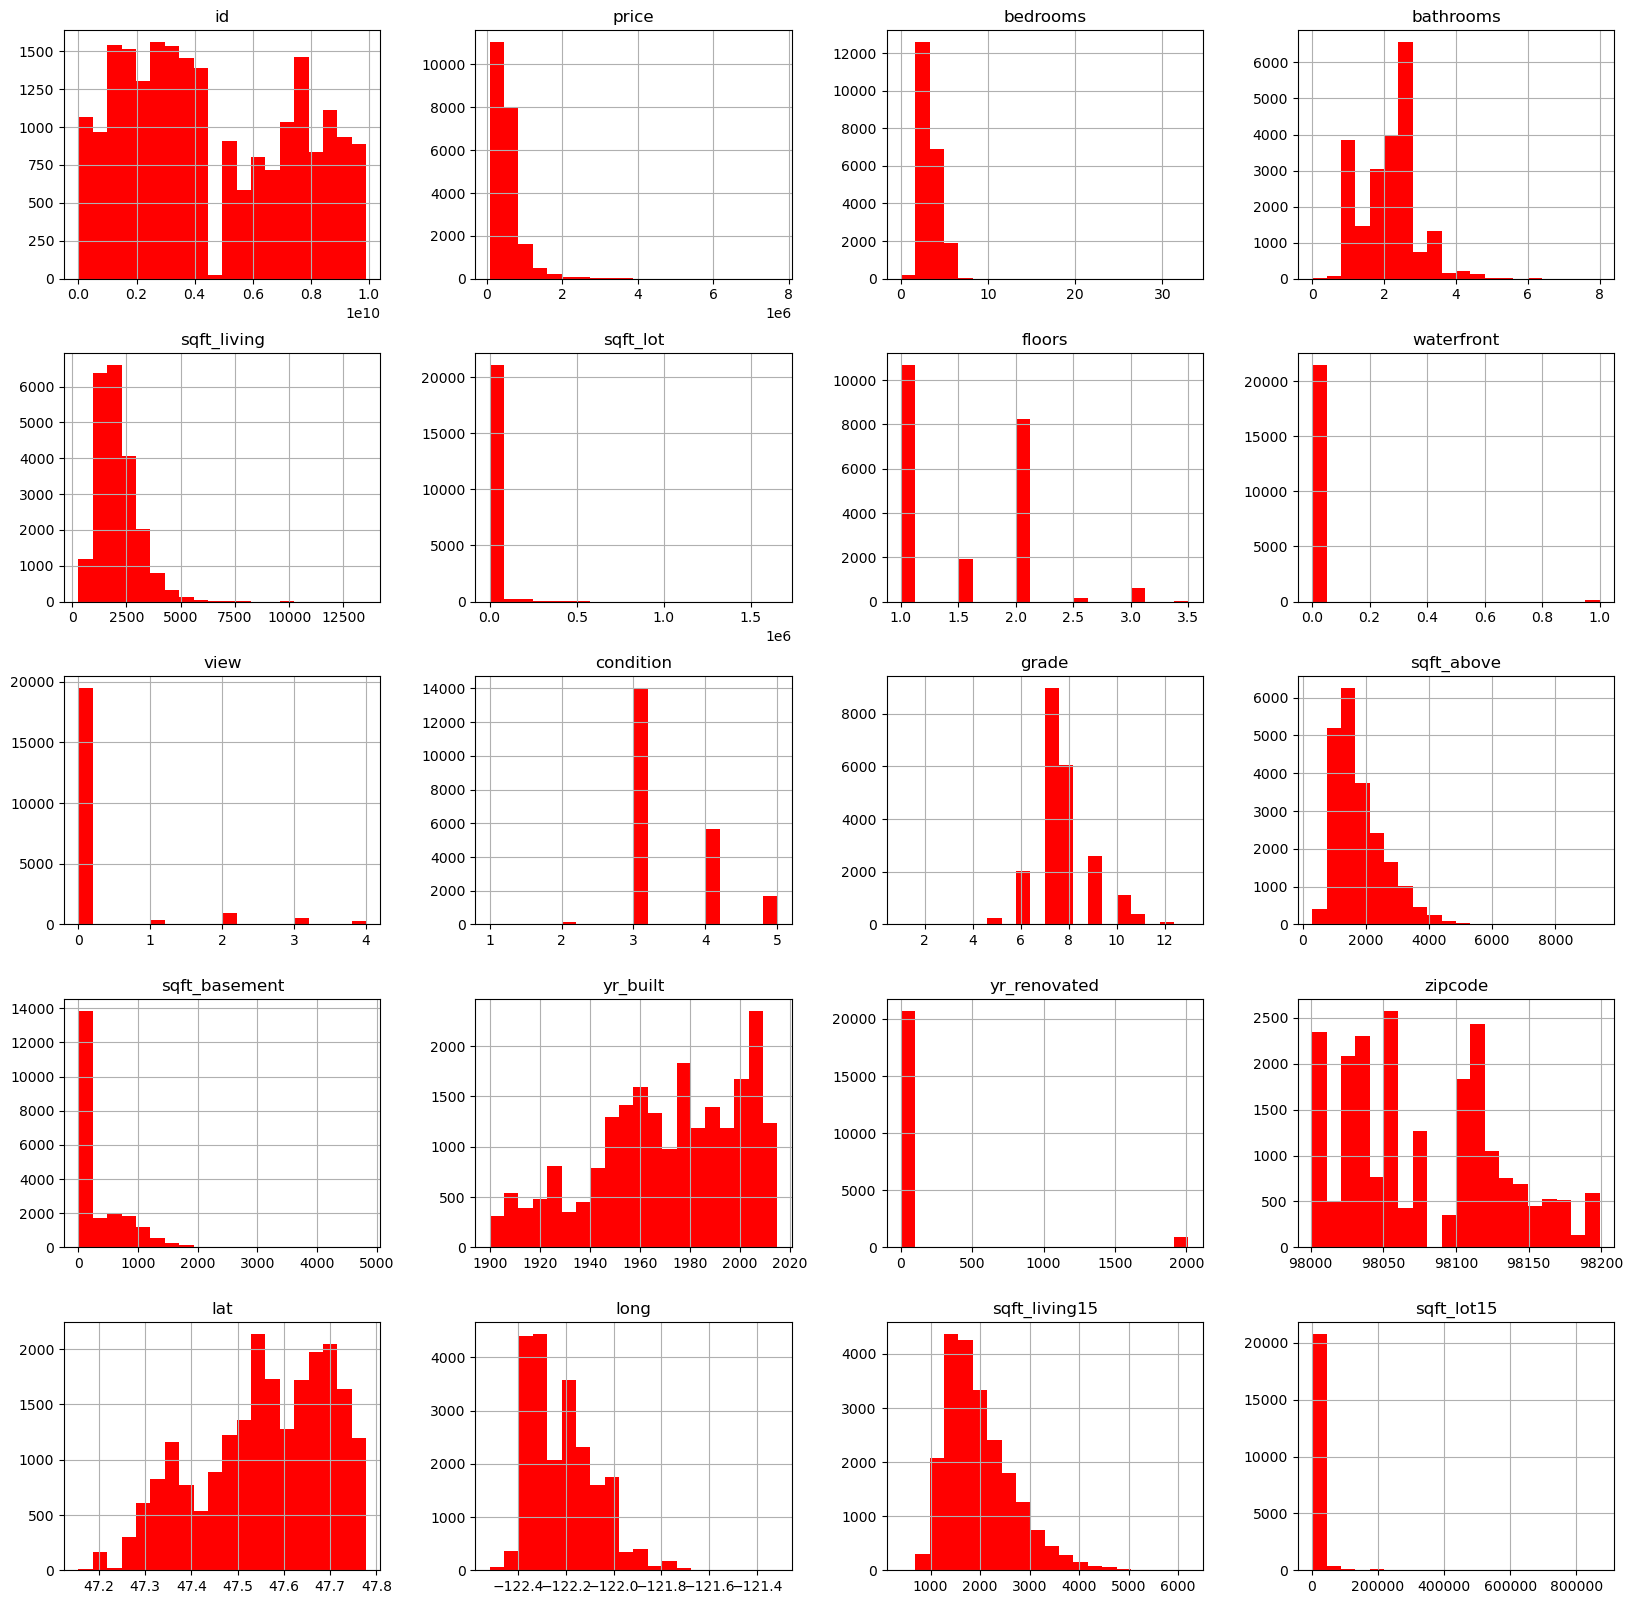

In [10]:
house_df.hist(bins = 20, figsize = (20,20), color = 'r')

/var/folders/zp/c3176_5j7jd988h2xj_1046w0000gn/T/ipykernel_52350/1147104236.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(house_df.corr(), annot = True)


<Axes: >

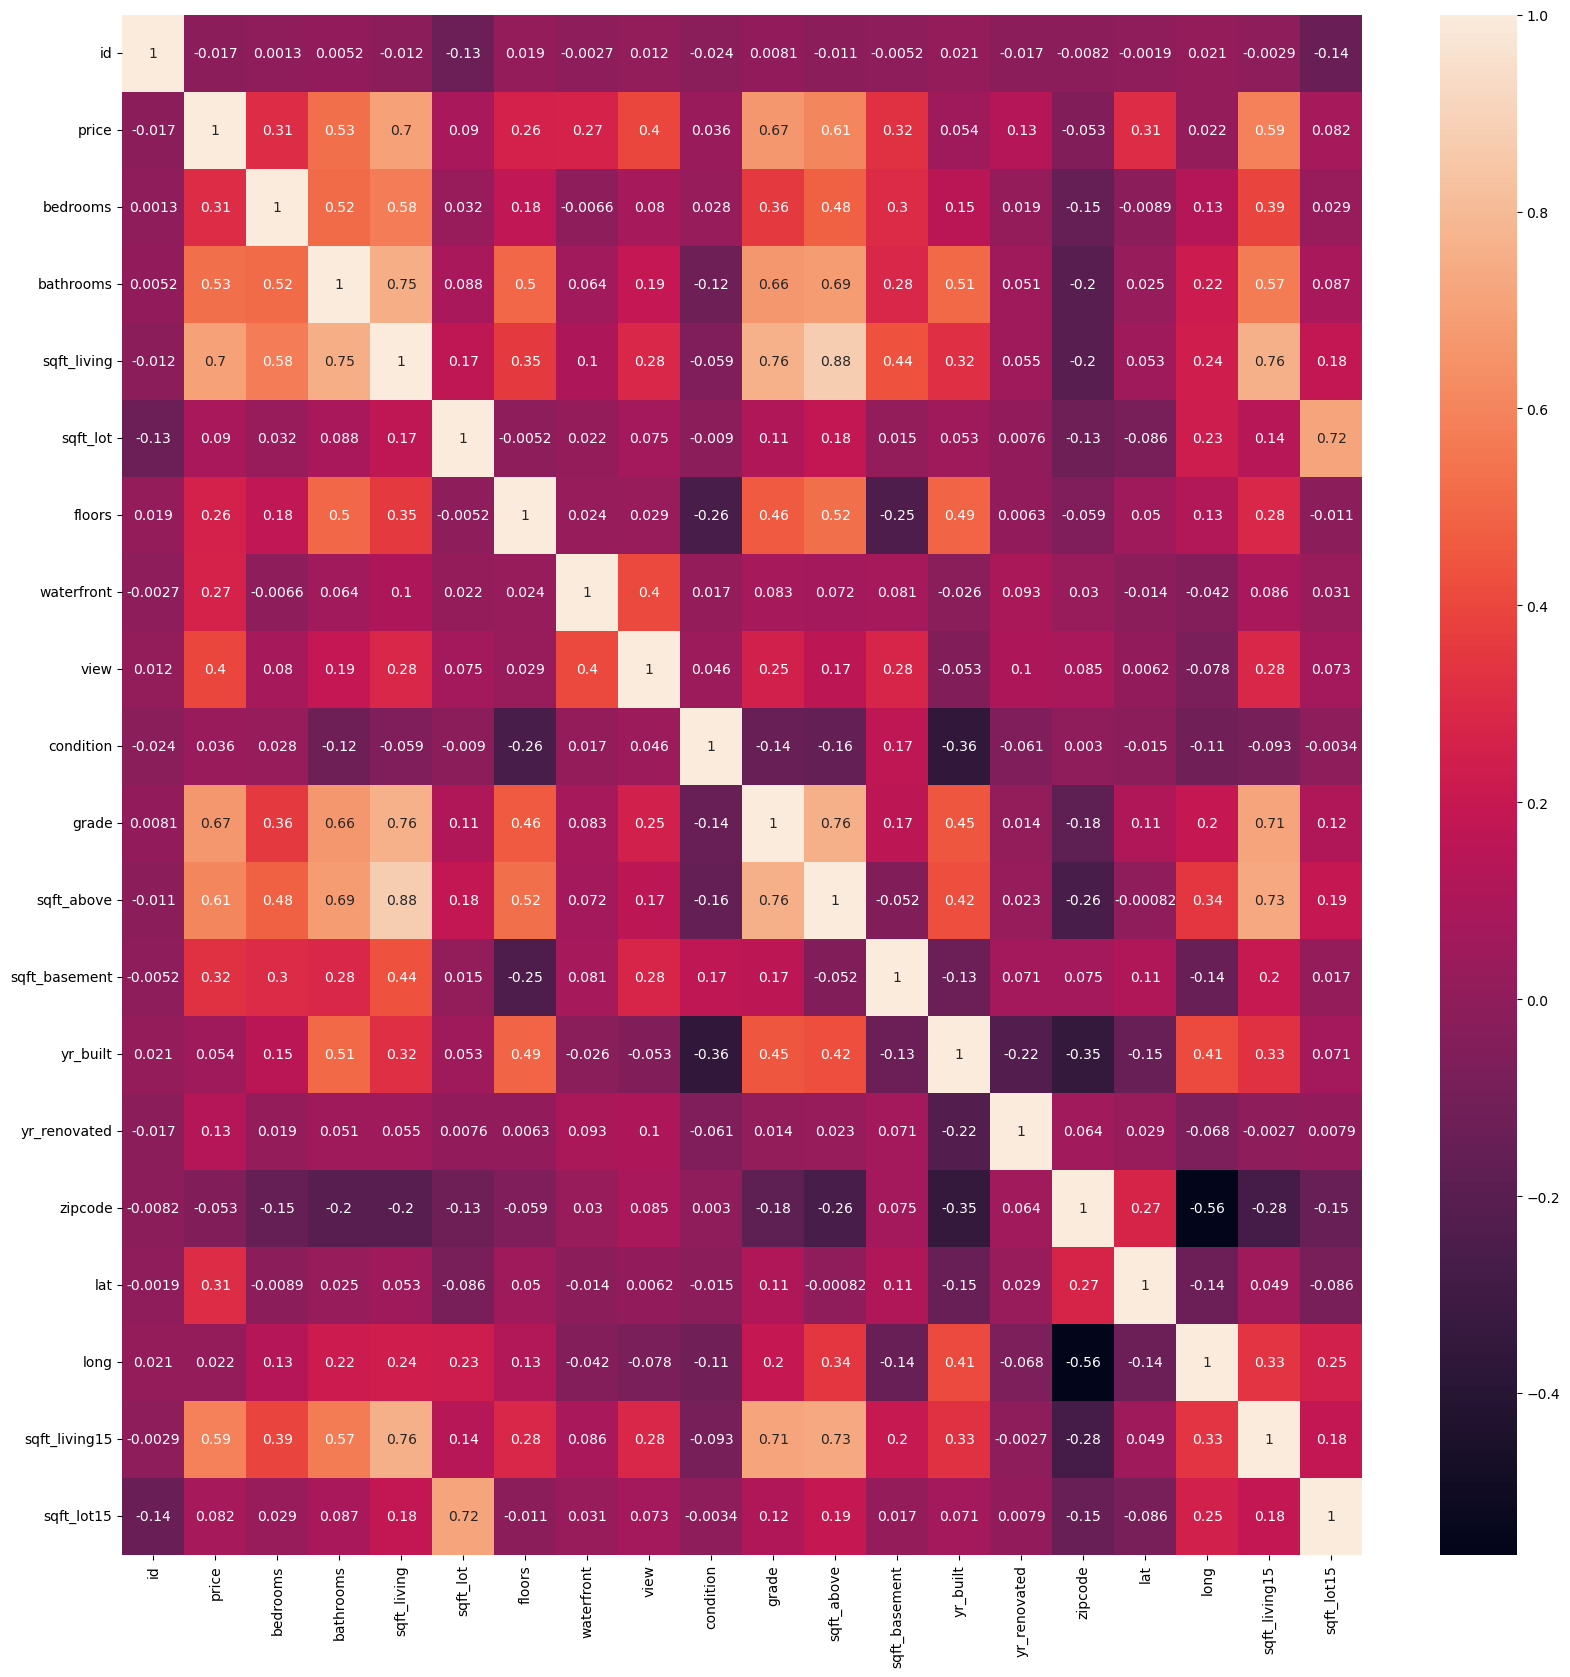

In [11]:
f, ax = plt.subplots(figsize = (20, 20))
sns.heatmap(house_df.corr(), annot = True)

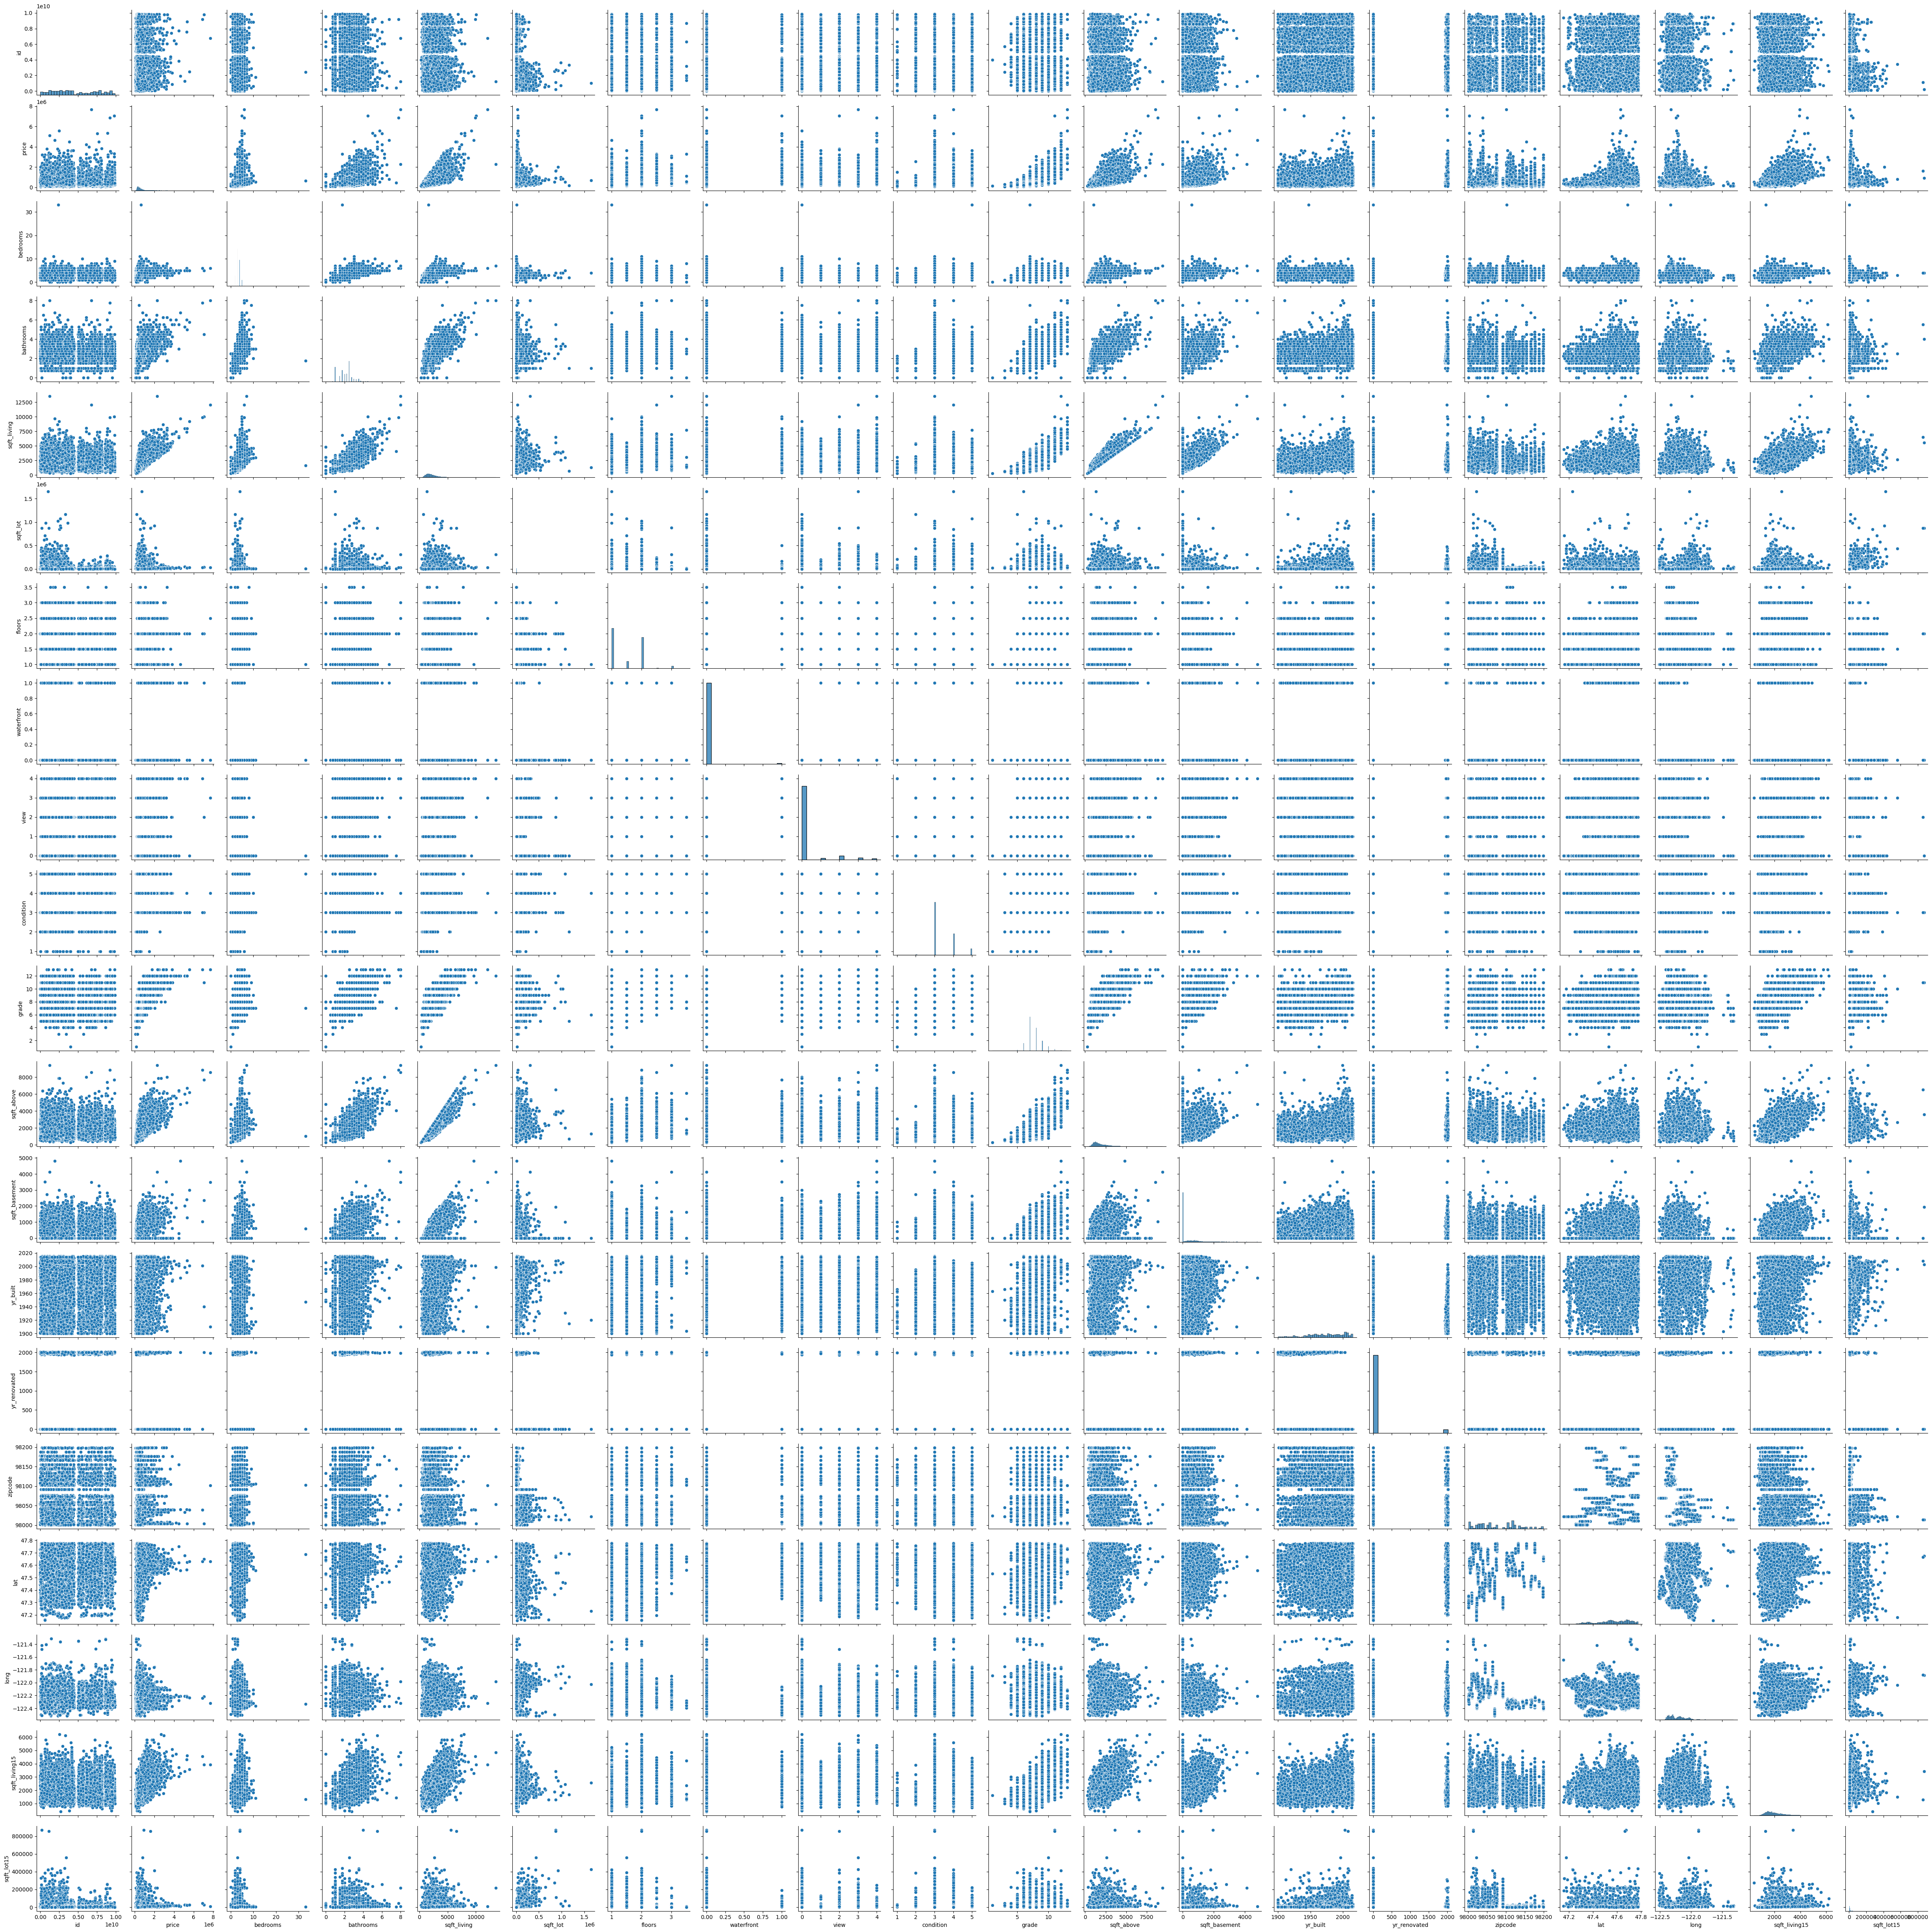

In [12]:
sns.pairplot(house_df)

In [13]:
house_df_sample = house_df[ ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'yr_built']   ]

In [14]:
house_df_sample

price  bedrooms  bathrooms  sqft_living  sqft_lot  sqft_above  \
0      221900.0         3       1.00         1180      5650        1180   
1      538000.0         3       2.25         2570      7242        2170   
2      180000.0         2       1.00          770     10000         770   
3      604000.0         4       3.00         1960      5000        1050   
4      510000.0         3       2.00         1680      8080        1680   
...         ...       ...        ...          ...       ...         ...   
21608  360000.0         3       2.50         1530      1131        1530   
21609  400000.0         4       2.50         2310      5813        2310   
21610  402101.0         2       0.75         1020      1350        1020   
21611  400000.0         3       2.50         1600      2388        1600   
21612  325000.0         2       0.75         1020      1076        1020   

       sqft_basement  yr_built  
0                  0      1955  
1                400      1951  
2                  0      1933  
3                910      1965  
4                  0      1987  
...              ...       ...  
21608              0      2009  
21609              0      2014  
21610              0      2009  
21611              0      2004  
21612              0      2008  

[21613 rows x 8 columns]

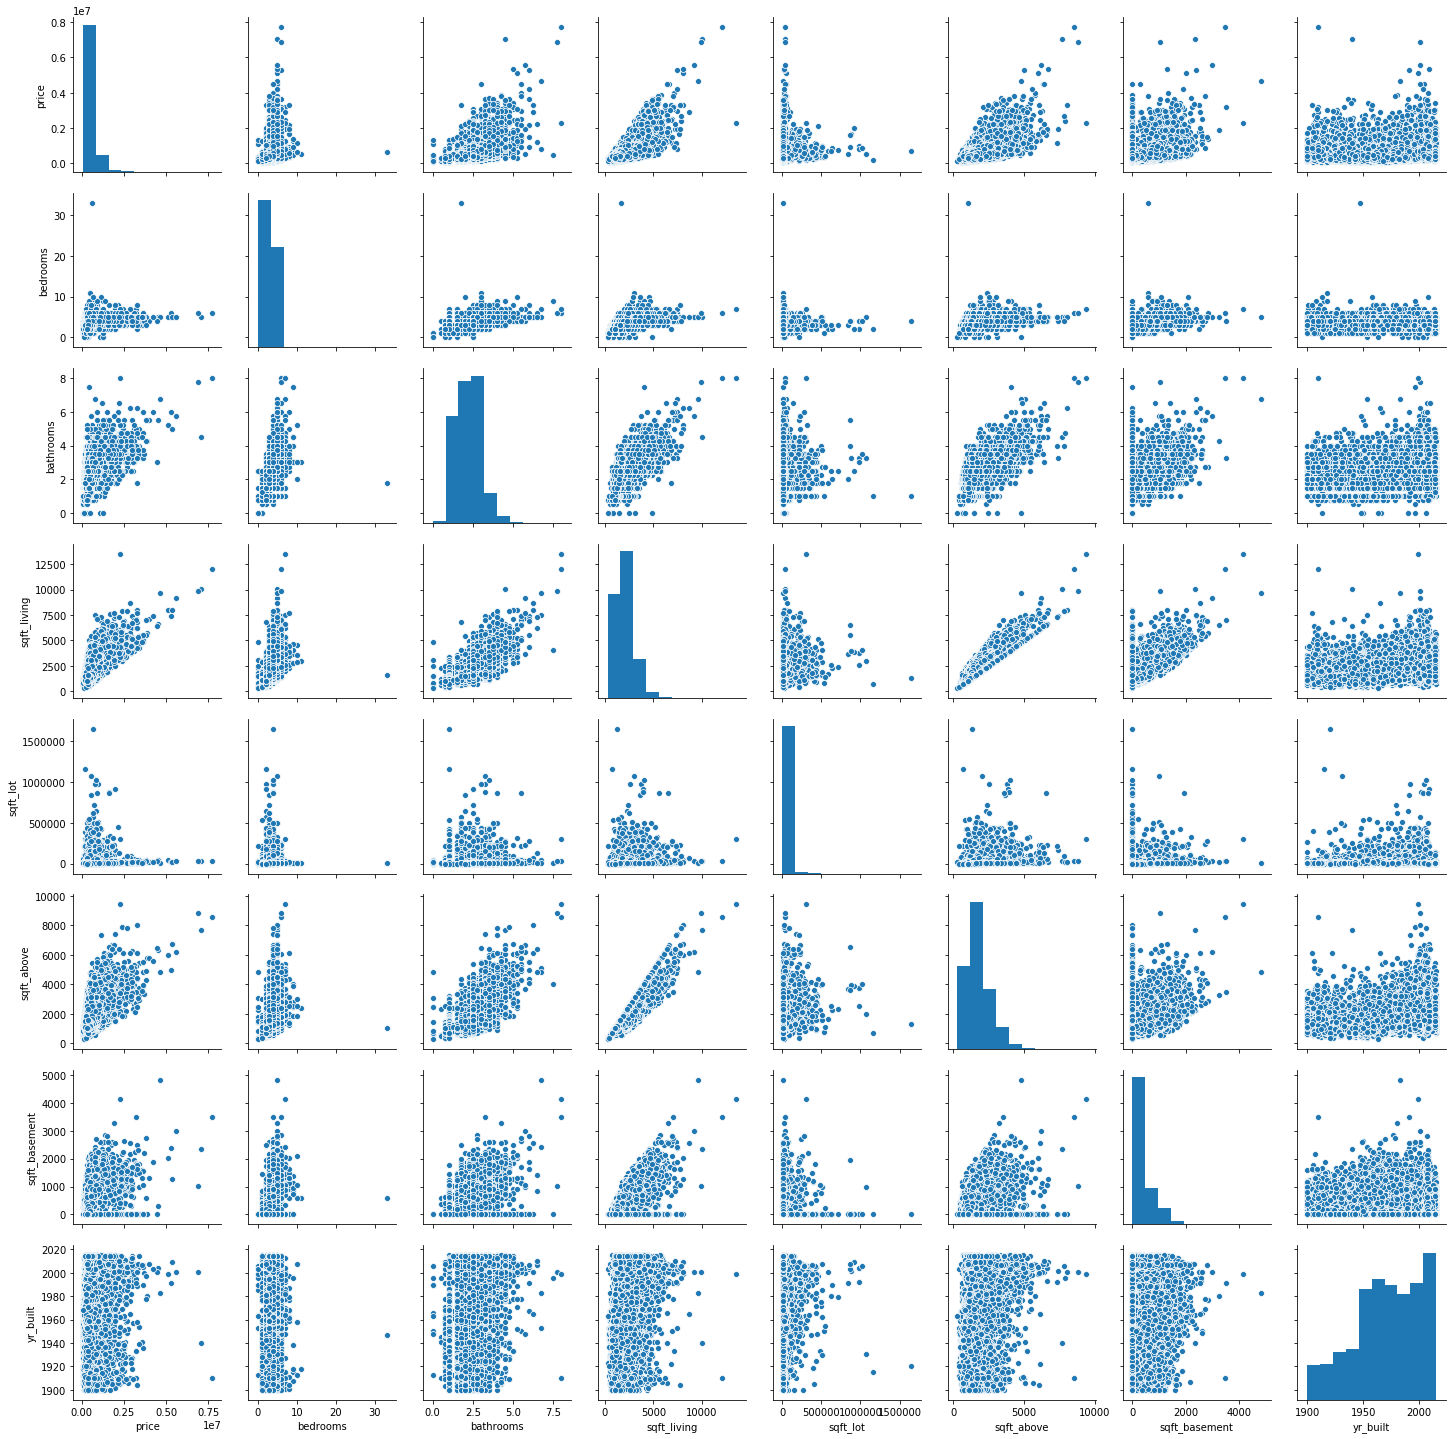

In [14]:
sns.pairplot(house_df_sample)

# STEP #3: CREATE TESTING AND TRAINING DATASET/DATA CLEANING

In [15]:
selected_features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'sqft_above', 'sqft_basement']

In [16]:
X = house_df[selected_features]

In [17]:
X

bedrooms  bathrooms  sqft_living  sqft_lot  floors  sqft_above  \
0             3       1.00         1180      5650     1.0        1180   
1             3       2.25         2570      7242     2.0        2170   
2             2       1.00          770     10000     1.0         770   
3             4       3.00         1960      5000     1.0        1050   
4             3       2.00         1680      8080     1.0        1680   
5             4       4.50         5420    101930     1.0        3890   
6             3       2.25         1715      6819     2.0        1715   
7             3       1.50         1060      9711     1.0        1060   
8             3       1.00         1780      7470     1.0        1050   
9             3       2.50         1890      6560     2.0        1890   
10            3       2.50         3560      9796     1.0        1860   
11            2       1.00         1160      6000     1.0         860   
12            3       1.00         1430     19901     1.5        1430   
13            3       1.75         1370      9680     1.0        1370   
14            5       2.00         1810      4850     1.5        1810   
15            4       3.00         2950      5000     2.0        1980   
16            3       2.00         1890     14040     2.0        1890   
17            4       1.00         1600      4300     1.5        1600   
18            2       1.00         1200      9850     1.0        1200   
19            3       1.00         1250      9774     1.0        1250   
20            4       1.75         1620      4980     1.0         860   
21            3       2.75         3050     44867     1.0        2330   
22            5       2.50         2270      6300     2.0        2270   
23            2       1.50         1070      9643     1.0        1070   
24            3       2.25         2450      6500     2.0        2450   
25            3       2.00         1710      4697     1.5        1710   
26            3       1.75         2450      2691     2.0        1750   
27            3       1.00         1400      1581     1.5        1400   
28            3       1.75         1520      6380     1.0         790   
29            4       2.50         2570      7173     2.0        2570   
...         ...        ...          ...       ...     ...         ...   
21583         2       1.00          710      1157     2.0         710   
21584         3       2.50         1260       900     2.0         940   
21585         3       2.50         1870      5000     2.0        1870   
21586         2       2.50         1430      1201     3.0        1430   
21587         3       2.50         1520      1488     3.0        1520   
21588         2       1.50         1210      1278     2.0        1020   
21589         3       2.50         2540      4760     2.0        2540   
21590         4       3.50         4910      9444     1.5        3110   
21591         4       2.75         2770      3852     2.0        2770   
21592         3       2.25         1190      1200     3.0        1190   
21593         5       3.75         4170      8142     2.0        4170   
21594         4       2.75         2500      5995     2.0        2500   
21595         2       2.25         1530       981     3.0        1480   
21596         5       2.75         3600      9437     2.0        3600   
21597         4       3.25         3410     10125     2.0        3410   
21598         4       2.50         3118      7866     2.0        3118   
21599         4       3.00         3990      7838     2.0        3990   
21600         5       3.75         4470      8088     2.0        4470   
21601         3       2.50         1425      1179     3.0        1425   
21602         3       1.75         1500     11968     1.0        1500   
21603         3       2.50         2270      5536     2.0        2270   
21604         3       2.00         1490      1126     3.0        1490   
21605         4       2.50         2520      6023     2.0        

In [18]:
y = house_df['price']

In [19]:
y

0         221900.0
1         538000.0
2         180000.0
3         604000.0
4         510000.0
5        1225000.0
6         257500.0
7         291850.0
8         229500.0
9         323000.0
10        662500.0
11        468000.0
12        310000.0
13        400000.0
14        530000.0
15        650000.0
16        395000.0
17        485000.0
18        189000.0
19        230000.0
20        385000.0
21       2000000.0
22        285000.0
23        252700.0
24        329000.0
25        233000.0
26        937000.0
27        667000.0
28        438000.0
29        719000.0
           ...    
21583     399950.0
21584     380000.0
21585     270000.0
21586     505000.0
21587     385000.0
21588     414500.0
21589     347500.0
21590    1222500.0
21591     572000.0
21592     475000.0
21593    1088000.0
21594     350000.0
21595     520000.0
21596     679950.0
21597    1575000.0
21598     541800.0
21599     810000.0
21600    1537000.0
21601     467000.0
21602     224000.0
21603     507250.0
21604     42

In [20]:
X.shape

(21613, 7)

In [21]:
y.shape

(21613,)

In [22]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [23]:
X_scaled

array([[0.09090909, 0.125     , 0.06716981, ..., 0.        , 0.09758772,
        0.        ],
       [0.09090909, 0.28125   , 0.17207547, ..., 0.4       , 0.20614035,
        0.08298755],
       [0.06060606, 0.125     , 0.03622642, ..., 0.        , 0.05263158,
        0.        ],
       ...,
       [0.06060606, 0.09375   , 0.05509434, ..., 0.4       , 0.08004386,
        0.        ],
       [0.09090909, 0.3125    , 0.09886792, ..., 0.4       , 0.14364035,
        0.        ],
       [0.06060606, 0.09375   , 0.05509434, ..., 0.4       , 0.08004386,
        0.        ]])

In [24]:
X_scaled.shape

(21613, 7)

In [25]:
scaler.data_max_

array([3.300000e+01, 8.000000e+00, 1.354000e+04, 1.651359e+06,
       3.500000e+00, 9.410000e+03, 4.820000e+03])

In [26]:
scaler.data_min_

array([  0.,   0., 290., 520.,   1., 290.,   0.])

In [27]:
y = y.values.reshape(-1,1)

In [28]:
y_scaled = scaler.fit_transform(y)

In [29]:
y_scaled

array([[0.01926557],
       [0.06072131],
       [0.01377049],
       ...,
       [0.04289849],
       [0.04262295],
       [0.03278689]])

# STEP#4: TRAINING THE MODEL

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size = 0.25)

In [31]:
X_train.shape

(16209, 7)

In [32]:
X_test.shape

(5404, 7)

In [33]:
import tensorflow.keras
from keras.models import Sequential 
from keras.layers import Dense

model = Sequential()
model.add(Dense(100, input_dim = 7, activation = 'relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(1, activation = 'linear'))

C:\Users\Dr. Ryan\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [34]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 100)               800       
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_3 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 101       
Total params: 21,101
Trainable params: 21,101
Non-trainable params: 0
_________________________________________________________________


In [35]:
model.compile(optimizer = 'Adam', loss = 'mean_squared_error')

In [36]:
epochs_hist = model.fit(X_train, y_train, epochs = 100, batch_size = 50, validation_split = 0.2)

Train on 12967 samples, validate on 3242 samples
Epoch 1/100
12967/12967 [==============================] - 1s 52us/step - loss: 0.0012 - val_loss: 0.0011
Epoch 2/100
12967/12967 [==============================] - 0s 29us/step - loss: 0.0011 - val_loss: 0.0013
Epoch 3/100
12967/12967 [==============================] - 0s 27us/step - loss: 0.0011 - val_loss: 0.0012
Epoch 4/100
12967/12967 [==============================] - 0s 28us/step - loss: 0.0010 - val_loss: 0.0010
Epoch 5/100
12967/12967 [==============================] - 0s 28us/step - loss: 0.0010 - val_loss: 0.0010
Epoch 6/100
12967/12967 [==============================] - 0s 28us/step - loss: 0.0010 - val_loss: 0.0010
Epoch 7/100
12967/12967 [==============================] - 0s 29us/step - loss: 9.9838e-04 - val_loss: 0.0011
Epoch 8/100
12967/12967 [==============================] - 0s 27us/step - loss: 9.9208e-04 - val_loss: 0.0011
Epoch 9/100
12967/12967 [==============================] - 0s 27us/step - loss: 0.0010 - val_lo

12967/12967 [==============================] - 0s 28us/step - loss: 9.1117e-04 - val_loss: 9.5641e-04
Epoch 75/100
12967/12967 [==============================] - 0s 26us/step - loss: 8.9687e-04 - val_loss: 0.0010
Epoch 76/100
12967/12967 [==============================] - 0s 26us/step - loss: 9.0697e-04 - val_loss: 0.0010
Epoch 77/100
12967/12967 [==============================] - 0s 26us/step - loss: 8.9351e-04 - val_loss: 9.9418e-04
Epoch 78/100
12967/12967 [==============================] - 0s 27us/step - loss: 9.1007e-04 - val_loss: 9.9312e-04
Epoch 79/100
12967/12967 [==============================] - 0s 26us/step - loss: 9.0616e-04 - val_loss: 9.8224e-04
Epoch 80/100
12967/12967 [==============================] - 0s 27us/step - loss: 9.0893e-04 - val_loss: 0.0011
Epoch 81/100
12967/12967 [==============================] - 0s 27us/step - loss: 8.9823e-04 - val_loss: 0.0010
Epoch 82/100
12967/12967 [==============================] - 0s 26us/step - loss: 8.9237e-04 - val_loss: 0.001

# STEP#5: EVALUATING THE MODEL 

In [37]:
epochs_hist.history.keys()

dict_keys(['val_loss', 'loss'])

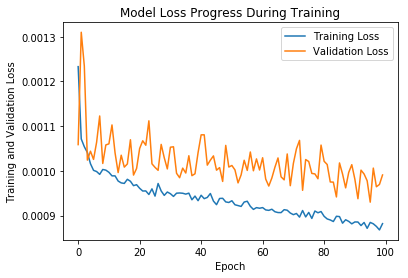

In [38]:
plt.plot(epochs_hist.history['loss'])
plt.plot(epochs_hist.history['val_loss'])
plt.title('Model Loss Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training and Validation Loss')
plt.legend(['Training Loss', 'Validation Loss'])

In [40]:
# 'bedrooms','bathrooms','sqft_living','sqft_lot','floors', 'sqft_above', 'sqft_basement'
X_test_1 = np.array([[ 4, 3, 1960, 5000, 1, 2000, 3000 ]])

scaler_1 = MinMaxScaler()
X_test_scaled_1 = scaler_1.fit_transform(X_test_1)

y_predict_1 = model.predict(X_test_scaled_1)

y_predict_1 = scaler.inverse_transform(y_predict_1)
y_predict_1

C:\Users\Dr. Ryan\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


array([[261462.73]], dtype=float32)

Text(0,0.5,'True Values')

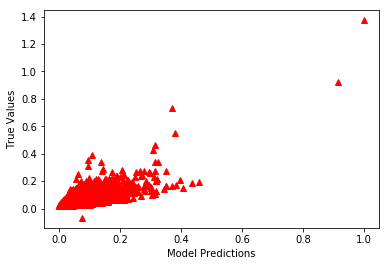

In [43]:
y_predict = model.predict(X_test)
plt.plot(y_test, y_predict, "^", color = 'r')
plt.xlabel('Model Predictions')
plt.ylabel('True Values')


In [44]:
y_predict_orig = scaler.inverse_transform(y_predict)
y_test_orig = scaler.inverse_transform(y_test)


(0, 3000000)

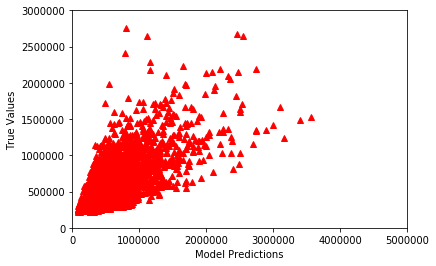

In [46]:
plt.plot(y_test_orig, y_predict_orig, "^", color = 'r')
plt.xlabel('Model Predictions')
plt.ylabel('True Values')
plt.xlim(0, 5000000)
plt.ylim(0, 3000000)

In [47]:
k = X_test.shape[1]
n = len(X_test)
n

5404

In [48]:
k

7

In [49]:


from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

RMSE = float(format(np.sqrt(mean_squared_error(y_test_orig, y_predict_orig)),'.3f'))
MSE = mean_squared_error(y_test_orig, y_predict_orig)
MAE = mean_absolute_error(y_test_orig, y_predict_orig)
r2 = r2_score(y_test_orig, y_predict_orig)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2) 


RMSE = 240656.948 
MSE = 57915766750.342766 
MAE = 156842.59201806533 
R2 = 0.5626056689248895 
Adjusted R2 = 0.5620382559676016


# MULTIPLE LINEAR REGRESSION 

In [50]:
X

bedrooms  bathrooms  sqft_living  sqft_lot  floors  sqft_above  \
0             3       1.00         1180      5650     1.0        1180   
1             3       2.25         2570      7242     2.0        2170   
2             2       1.00          770     10000     1.0         770   
3             4       3.00         1960      5000     1.0        1050   
4             3       2.00         1680      8080     1.0        1680   
5             4       4.50         5420    101930     1.0        3890   
6             3       2.25         1715      6819     2.0        1715   
7             3       1.50         1060      9711     1.0        1060   
8             3       1.00         1780      7470     1.0        1050   
9             3       2.50         1890      6560     2.0        1890   
10            3       2.50         3560      9796     1.0        1860   
11            2       1.00         1160      6000     1.0         860   
12            3       1.00         1430     19901     1.5        1430   
13            3       1.75         1370      9680     1.0        1370   
14            5       2.00         1810      4850     1.5        1810   
15            4       3.00         2950      5000     2.0        1980   
16            3       2.00         1890     14040     2.0        1890   
17            4       1.00         1600      4300     1.5        1600   
18            2       1.00         1200      9850     1.0        1200   
19            3       1.00         1250      9774     1.0        1250   
20            4       1.75         1620      4980     1.0         860   
21            3       2.75         3050     44867     1.0        2330   
22            5       2.50         2270      6300     2.0        2270   
23            2       1.50         1070      9643     1.0        1070   
24            3       2.25         2450      6500     2.0        2450   
25            3       2.00         1710      4697     1.5        1710   
26            3       1.75         2450      2691     2.0        1750   
27            3       1.00         1400      1581     1.5        1400   
28            3       1.75         1520      6380     1.0         790   
29            4       2.50         2570      7173     2.0        2570   
...         ...        ...          ...       ...     ...         ...   
21583         2       1.00          710      1157     2.0         710   
21584         3       2.50         1260       900     2.0         940   
21585         3       2.50         1870      5000     2.0        1870   
21586         2       2.50         1430      1201     3.0        1430   
21587         3       2.50         1520      1488     3.0        1520   
21588         2       1.50         1210      1278     2.0        1020   
21589         3       2.50         2540      4760     2.0        2540   
21590         4       3.50         4910      9444     1.5        3110   
21591         4       2.75         2770      3852     2.0        2770   
21592         3       2.25         1190      1200     3.0        1190   
21593         5       3.75         4170      8142     2.0        4170   
21594         4       2.75         2500      5995     2.0        2500   
21595         2       2.25         1530       981     3.0        1480   
21596         5       2.75         3600      9437     2.0        3600   
21597         4       3.25         3410     10125     2.0        3410   
21598         4       2.50         3118      7866     2.0        3118   
21599         4       3.00         3990      7838     2.0        3990   
21600         5       3.75         4470      8088     2.0        4470   
21601         3       2.50         1425      1179     3.0        1425   
21602         3       1.75         1500     11968     1.0        1500   
21603         3       2.50         2270      5536     2.0        2270   
21604         3       2.00         1490      1126     3.0        1490   
21605         4       2.50         2520      6023     2.0        

In [51]:
y

array([[221900.],
       [538000.],
       [180000.],
       ...,
       [402101.],
       [400000.],
       [325000.]])

In [55]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [56]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression(fit_intercept = True)
regressor.fit(X_train, y_train)
print('Linear Model Coeff (m)', regressor.coef_)
print('Linear Model Coeff (b)', regressor.intercept_)

Linear Model Coeff (m) [[-6.58798196e+04  6.60584214e+03  2.16580633e+02 -3.19245144e-01
   9.29721044e+03  8.96820265e+01  1.26898606e+02]]
Linear Model Coeff (b) [91370.41144297]


In [57]:
y_predict = regressor.predict(X_test)


(0, 3000000)

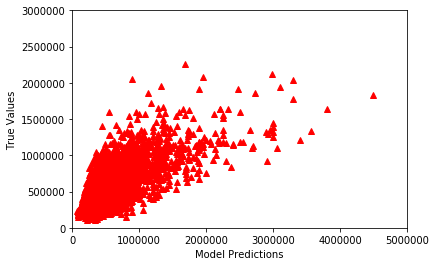

In [58]:
plt.plot(y_test, y_predict, "^", color = 'r')
plt.xlabel('Model Predictions')
plt.ylabel('True Values')
plt.xlim(0, 5000000)
plt.ylim(0, 3000000)

In [59]:
k = X_test.shape[1]
n = len(X_test)

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

RMSE = float(format(np.sqrt(mean_squared_error(y_test, y_predict)),'.3f'))
MSE = mean_squared_error(y_test, y_predict)
MAE = mean_absolute_error(y_test, y_predict)
r2 = r2_score(y_test, y_predict)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2) 


RMSE = 265402.524 
MSE = 70438499551.73161 
MAE = 172075.03033745594 
R2 = 0.5019812118150189 
Adjusted R2 = 0.5013351533425773


# LET'S INCREASE THE NUMBER OF FEATURES (INDEPENDANT VARIABLES)

In [61]:
selected_features = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors', 'sqft_above', 'sqft_basement', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'yr_built', 
'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']

X = house_df[selected_features]

In [62]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [63]:
y = house_df['price']

In [64]:
y = y.values.reshape(-1,1)
y_scaled = scaler.fit_transform(y)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size = 0.25)

In [65]:
import tensorflow.keras
from keras.models import Sequential 
from keras.layers import Dense

model = Sequential()
model.add(Dense(50, input_dim = 19, activation = 'relu'))
model.add(Dense(50, activation = 'relu'))
model.add(Dense(1, activation = 'linear'))

In [66]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [67]:
epochs_hist = model.fit(X_train, y_train, epochs = 100, batch_size = 50, verbose = 1, validation_split = 0.2)

Train on 12967 samples, validate on 3242 samples
Epoch 1/100
12967/12967 [==============================] - 1s 40us/step - loss: 9.4842e-04 - val_loss: 6.0909e-04
Epoch 2/100
12967/12967 [==============================] - 0s 20us/step - loss: 5.8879e-04 - val_loss: 7.0941e-04
Epoch 3/100
12967/12967 [==============================] - 0s 21us/step - loss: 5.4578e-04 - val_loss: 5.0918e-04
Epoch 4/100
12967/12967 [==============================] - 0s 21us/step - loss: 4.8791e-04 - val_loss: 5.0040e-04
Epoch 5/100
12967/12967 [==============================] - 0s 22us/step - loss: 4.5988e-04 - val_loss: 5.7489e-04
Epoch 6/100
12967/12967 [==============================] - 0s 20us/step - loss: 4.6605e-04 - val_loss: 4.3106e-04
Epoch 7/100
12967/12967 [==============================] - 0s 20us/step - loss: 4.1921e-04 - val_loss: 4.4578e-04
Epoch 8/100
12967/12967 [==============================] - 0s 19us/step - loss: 4.0278e-04 - val_loss: 4.8361e-04
Epoch 9/100
12967/12967 [==============

Epoch 72/100
12967/12967 [==============================] - 0s 21us/step - loss: 2.0247e-04 - val_loss: 2.6752e-04
Epoch 73/100
12967/12967 [==============================] - 0s 21us/step - loss: 1.9657e-04 - val_loss: 2.6749e-04
Epoch 74/100
12967/12967 [==============================] - 0s 20us/step - loss: 2.0376e-04 - val_loss: 2.5954e-04
Epoch 75/100
12967/12967 [==============================] - 0s 20us/step - loss: 1.9792e-04 - val_loss: 2.6144e-04
Epoch 76/100
12967/12967 [==============================] - 0s 24us/step - loss: 2.1003e-04 - val_loss: 2.9634e-04
Epoch 77/100
12967/12967 [==============================] - 0s 22us/step - loss: 2.0149e-04 - val_loss: 2.8926e-04
Epoch 78/100
12967/12967 [==============================] - 0s 22us/step - loss: 2.1099e-04 - val_loss: 2.5846e-04
Epoch 79/100
12967/12967 [==============================] - 0s 20us/step - loss: 2.0011e-04 - val_loss: 2.7451e-04
Epoch 80/100
12967/12967 [==============================] - 0s 22us/step - loss:

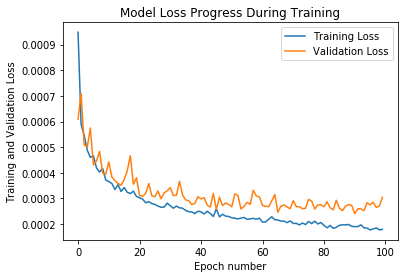

In [68]:
plt.plot(epochs_hist.history['loss'])
plt.plot(epochs_hist.history['val_loss'])
plt.title('Model Loss Progress During Training')
plt.ylabel('Training and Validation Loss')
plt.xlabel('Epoch number')
plt.legend(['Training Loss', 'Validation Loss'])

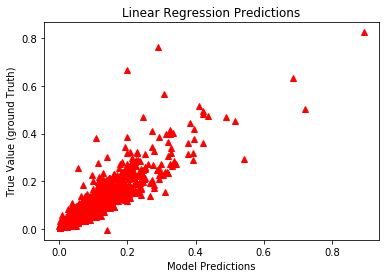

In [69]:
y_predict = model.predict(X_test)
plt.plot(y_test, y_predict, "^", color = 'r')
plt.xlabel("Model Predictions")
plt.ylabel("True Value (ground Truth)")
plt.title('Linear Regression Predictions')
plt.show()

In [70]:
y_predict_orig = scaler.inverse_transform(y_predict)
y_test_orig = scaler.inverse_transform(y_test)


In [71]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

RMSE = float(format(np.sqrt(mean_squared_error(y_test_orig, y_predict_orig)),'.3f'))
MSE = mean_squared_error(y_test_orig, y_predict_orig)
MAE = mean_absolute_error(y_test_orig, y_predict_orig)
r2 = r2_score(y_test_orig, y_predict_orig)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2) 


RMSE = 168011.971 
MSE = 28228022368.504776 
MAE = 94173.20084225805 
R2 = 0.8081674097850778 
Adjusted R2 = 0.8079185535709369


# EXCELLENT JOB! NOW YOU'VE MASTERED ANNs TO PERFORM REGRESSION TASKS!